In [1]:
import numpy as np
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import solve_ivp

0.9997357911430284
2.999002602007225
4.9984630536101795
6.997581019308493
8.99625426759958


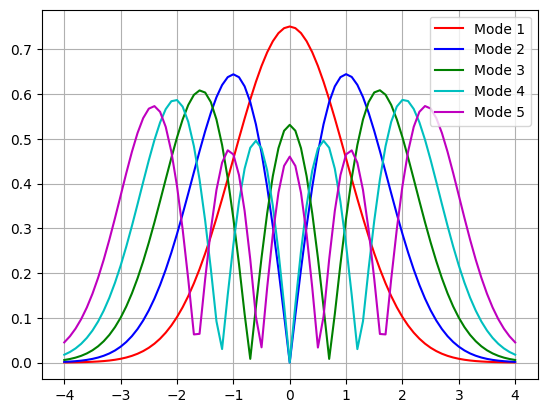

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the ODE system for solve_ivp
def shoot2(x, phi, eps):
    return [phi[1], (x**2 - eps) * phi[0]]

# Parameters
tol = 1e-4  # tolerance level for eigenvalue convergence
col = ['r', 'b', 'g', 'c', 'm', 'k']  # colors for plotting eigenfunctions
eps0 = 0.75  # initial eigenvalue guess

xp = [-4, 4]  # domain boundaries (L = 4)
xshoot = np.linspace(xp[0], xp[1], num=81)  # spatial grid within xp

eps_start = eps0  # starting value of beta (initial guess for eigenvalue)

eigenfunc_matrix = []
eigenvalues = []

# Begin mode loop to find and plot the first 5 eigenfunctions
for modes in range(1, 6):
    eps = eps_start  # initial eigenvalue guess for the current mode
    deps = eps0 / 100  # step size for adjusting beta during shooting

    for _ in range(1000):  # convergence loop for shooting method
        phi0 = [1, np.sqrt(4**2 - eps)]  # boundary conditions (phi(-4) = 1), dphi(-4)/dx = np.sqrt(4**2-eps))

        # Solve ODE using solve_ivp
        sol = solve_ivp(shoot2, xp, phi0, args=(eps,), t_eval=xshoot)
        y = sol.y  # extract solution matrix

        # Check if solution converged
        boundary_condition = y[1, -1] + np.sqrt(4**2 - eps) * y[0, -1]
        if np.abs(boundary_condition) < tol:
            print(eps)  # eigenvalue found
            eigenvalues.append(eps)
            break

        # Adjust beta based on the sign of the solution at the boundary
        if (-1) ** (modes + 1) * boundary_condition > 0:
            eps += deps  # Decrease beta if under
        else:
            eps -= deps  # Increase beta and reduce step size
            deps /= 2

    eps_start = eps + 0.1  # update beta for next mode
    
    # Normalize the eigenfunction
    norm = np.trapz(y[0]**2, xshoot)
    eigenfunc_matrix.append(np.abs(y[0] / np.sqrt(norm)))
    plt.plot(xshoot, eigenfunc_matrix[-1], col[modes - 1])  # plot eigenfunction

# Plot results
plt.legend([f'Mode {i+1}' for i in range(5)])
plt.grid(True)
plt.show()

A1 = np.array(eigenfunc_matrix).T
A2 = np.array(eigenvalues)

In [3]:
N=79
L=4
B = np.zeros((N, N))

x = np.linspace(-L, L, N + 2) # add boundary points
dx = x[1] - x[0] # compute dx

for j in range(N):
    B[j, j] = -2
for j in range(N - 1):
    B[j, j + 1] = 1
    B[j + 1, j] = 1
    
B2 = np.copy(B)
B2[0, 0] = -2 / 3
B2[0, 1] = 2 / 3
B2[N - 1, N - 1] = -2 / 3
B2[N - 1, N - 2] = 2 / 3
B2 = B2 / (dx**2) # Neumann matrices for B

x = np.linspace(-L, L, N + 2) # add boundary points
dx = x[1] - x[0] # compute dx
P = np.zeros((N, N)) # Compute P matrix
for j in range(N):
    P[j, j] = x[j + 1] ** 2 # potential x^2

linL = B2 - P # Compute linear operator

D, V = np.linalg.eig(-linL)  # Compute eigenvalues/eigenvectors
sorted_indices = np.argsort(np.abs(D))  # Sort by absolute value in ascending order
Dsort = D[sorted_indices]
Vsort = V[:, sorted_indices]
D5 = Dsort[:5]  # Take the five smallest eigenvalues by absolute value
V5 = Vsort[:, :5]  # Corresponding eigenvectors
V5 = np.vstack(((4/3) * V5[0,:] - (1/3)*V5[1,:],V5,(4/3) * V5[-1,:] - (1/3)*V5[-2,:]))
for i in range(5):
    V5[:,i] = np.abs(V5[:,i]/np.sqrt(np.trapz(np.abs(V5[:,i]**2),x)))
A3 = V5
A4 = D5

0.11076562500000009
1.0138427734374997
0.34343750000000023
2.9225830078125012
0.10913281250000008
0.9741210937499999
0.34118750000000025
2.893847656250002


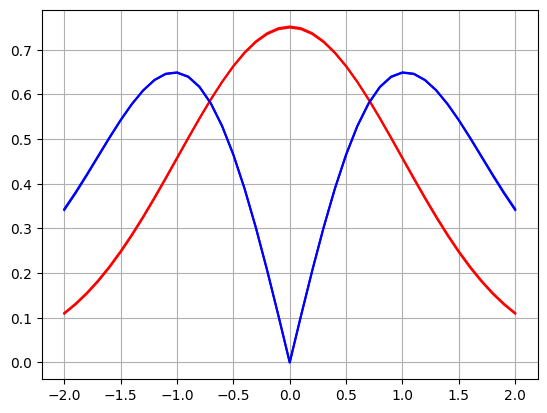

In [4]:
# Define the ODE system
def shoot2(phi, x, eps, gamma):
    return [phi[1], (gamma * phi[0]**2 + x**2 - eps) * phi[0]]
def hw1_rhs_a(phi, x, epsilon_n, gamma):
    phi, phi_x = phi
    dphi_dx = phi_x
    dphi_x_dx = (gamma * abs(phi)**2 + 1 * x**2 - epsilon_n) * phi
    return [dphi_dx, dphi_x_dx]
# Parameters
tol = 1e-4  # tolerance level for eigenvalue convergence
col = ['r', 'b', 'g', 'c', 'm', 'k']  # colors for plotting eigenfunctions
L=2

xshoot = np.arange(-L,L+0.1,0.1)
A5 = np.zeros((len(xshoot),2))
A6 = np.zeros(2)
A7 = np.zeros((len(xshoot),2))
A8 = np.zeros(2)
A = 0.001
deltaA = 0.001
for gamma in [0.05,-0.05]:
    eps_start = 0.1
    for modes in range(1,3):
        A = 0.001
        deltaA = 0.001
        
        for _ in range(1000):
            eps_n = eps_start
            deps_n = 0.1

            for _ in range(1000):
                phi0 = [A, A*np.sqrt(L**2-eps_n)]
                y = odeint(hw1_rhs_a, phi0, xshoot, args=(eps_n,gamma))

                bound_cond2 = y[-1,1] + np.sqrt(L**2 - eps_n) * y[-1,0]
                if abs(bound_cond2 - 0) < tol:
                    break
                if (-1) ** (modes+1) * bound_cond2 > 0:
                    eps_n += deps_n
                else:
                    eps_n -= deps_n / 2
                    deps_n /= 2

            norm = np.abs(np.trapz(y[:,0]**2, xshoot))
            if abs(norm - 1) < tol:
                print(A)
                if gamma < 0:
                    A7[:, modes - 1] = np.abs(y[:,0]) / np.sqrt(norm)
                    A8[modes - 1] = eps_n
                else:
                    A5[:,modes - 1] = np.abs(y[:,0]) / np.sqrt(norm)
                    A6[modes - 1] = eps_n
                print(eps_n)
                break
            else:
                if norm > 1:
                    A -= deltaA
                    deltaA /= 2
                else:
                    A+= deltaA
        eps_start = eps_n + 0.5

        plt.plot(xshoot, np.abs(y[:,0])/np.sqrt(norm),col[modes-1])
plt.grid(True)
plt.show()

In [5]:
print(A6)
print(A8)

[1.01384277 2.92258301]
[0.97412109 2.89384766]


RK45 slope: 5.24
RK23 slope: 3.02
Radau slope: 4.04
BDF slope: 6.46


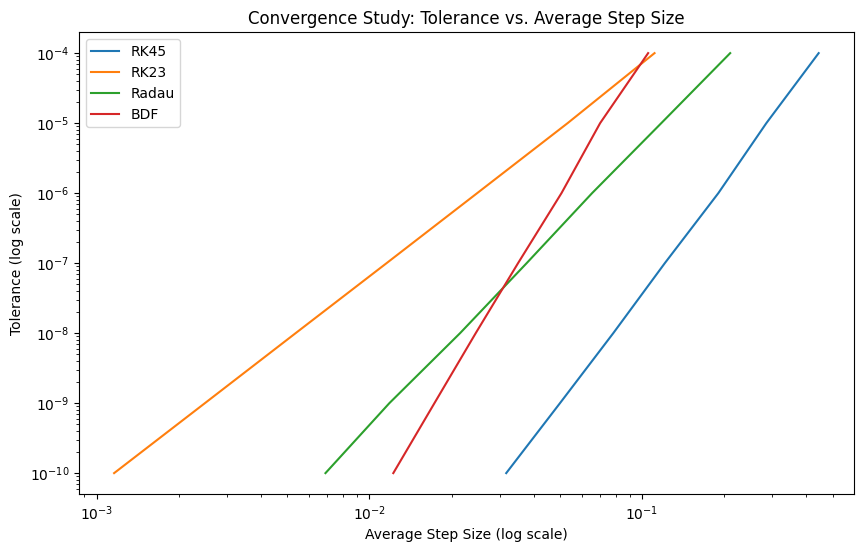

(4,)

In [ ]:
# Define the parameters
L = 2
K = 1  # Example value for K, adjust based on context if specified elsewhere
epsilon_n = 1
gamma = 0
tolerances = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]

# Initial conditions
phi_initial = 1
phi_x_initial = np.sqrt(K * L**2 - 1)
y0 = [phi_initial, phi_x_initial]

# Function to represent the system of first-order equations
def hw1_rhs_a(x, y, epsilon_n):
    phi, phi_x = y
    dphi_dx = phi_x
    dphi_x_dx = (gamma * abs(phi)**2 + K * x**2 - epsilon_n) * phi
    return [dphi_dx, dphi_x_dx]

# Span of x
x_span = [-L, L]

# Placeholder for results
average_step_sizes = {method: [] for method in ['RK45', 'RK23', 'Radau', 'BDF']}

# Loop through methods and tolerances
for method in average_step_sizes.keys():
    for TOL in tolerances:
        options = {'rtol': TOL, 'atol': TOL}
        sol = solve_ivp(hw1_rhs_a, x_span, y0, method=method, args=(epsilon_n,), **options)
        
        # Calculate the average step size
        avg_step_size = np.mean(np.diff(sol.t))
        average_step_sizes[method].append(avg_step_size)

# Plotting and analyzing slopes
plt.figure(figsize=(10, 6))
slopes = []

for method, avg_steps in average_step_sizes.items():
    plt.loglog(avg_steps, tolerances, label=method)
    slope, _ = np.polyfit(np.log(avg_steps), np.log(tolerances), 1)
    slopes.append(slope)
    print(f"{method} slope: {slope:.2f}")

plt.xlabel('Average Step Size (log scale)')
plt.ylabel('Tolerance (log scale)')
plt.legend()
plt.title("Convergence Study: Tolerance vs. Average Step Size")
plt.show()

# Save slopes as a 4x1 vector
A9 = np.array(slopes).reshape((4,))


In [7]:
L = 4
xshoot = np.arange(-L,L+0.1, 0.1)
x= xshoot
exact_gauss = np.zeros((len(xshoot),5))
h = [np.ones(len(xshoot)),
     2 * x,
     4 * x**2 - 2,
     8*x**3 - 12*x,
     16*x**4 - 48*x**2 + 12
]
def factorial(n):
    result = 1
    for i in range(1, n+1):
        result *= i
    return result
    
exact_gauss = np.zeros((len(xshoot),5))

A10 = []
A12 = []
for i in range(5):
    sqrt_expression = factorial(i) * 2**i * np.sqrt(np.pi)
    exact_gauss[:,i] = np.abs(h[i]) * np.exp(-x**2 / 2) / np.sqrt(sqrt_expression)
    exact_gauss[:,i] = np.abs(exact_gauss[:,i])
    norm = np.abs(np.trapz(exact_gauss[:,i]**2,xshoot))
    exact_gauss[:, i] = np.abs(exact_gauss[:,i]) / np.sqrt(norm)

    A10.append(np.trapz((exact_gauss[:,i] - np.abs(A1[:,i]))**2,xshoot))
    A12.append(np.trapz((exact_gauss[:,i] - np.abs(A3[:,i]))**2,xshoot))

exact_eigval = [1,3,5,7,9]
A11 = 100*np.abs((A2 - exact_eigval)) / exact_eigval
A13 = 100*np.abs((A4 - exact_eigval)) / exact_eigval